In [25]:
import tkinter as tk
from tkinter import filedialog
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import cv2

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-1-izv7o6.dcm


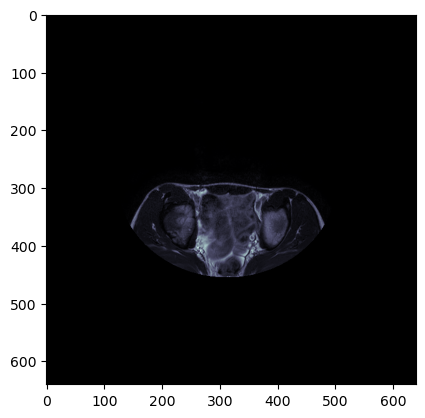

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-10-1gikf8u.dcm


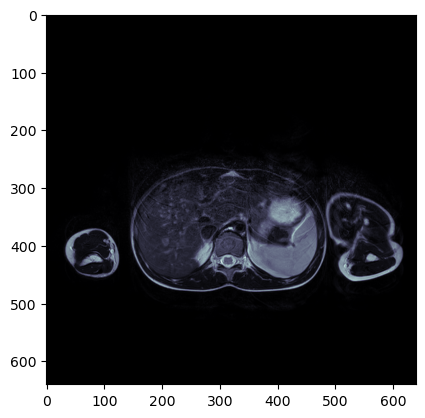

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-11-j1hlc0.dcm


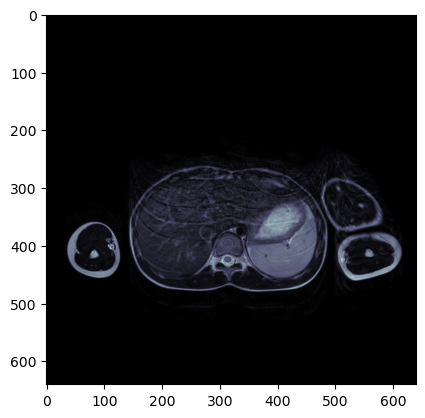

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-12-t5o2e.dcm


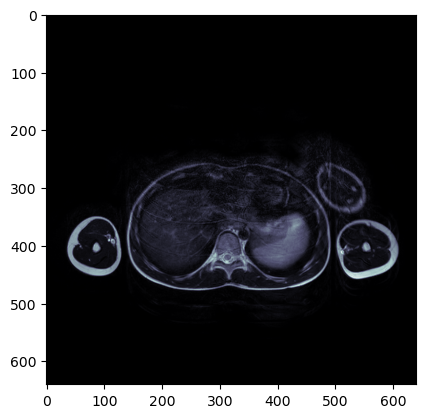

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-13-tvaj2.dcm


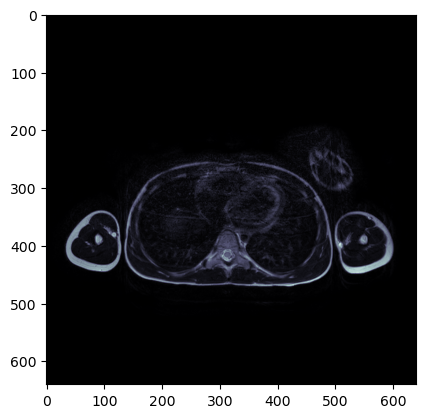

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-14-140swid.dcm


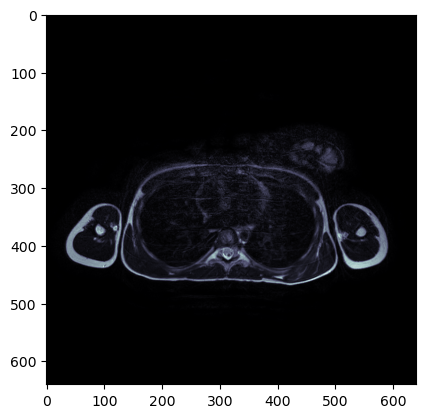

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-15-1pf58pt.dcm


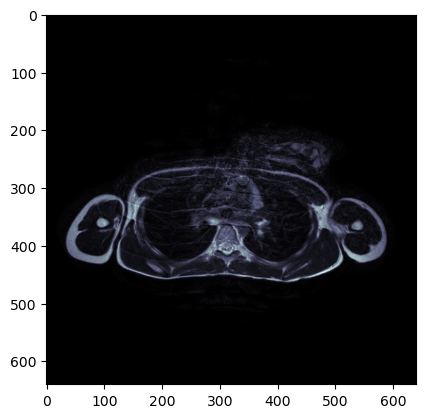

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-16-1ruu4et.dcm


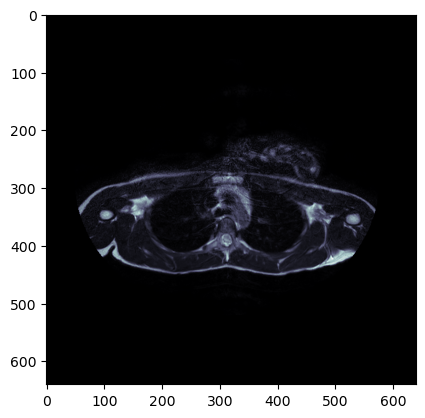

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-17-zhbjl5.dcm


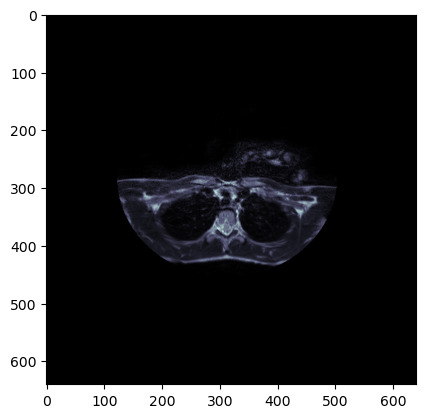

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-2-ph6cq9.dcm


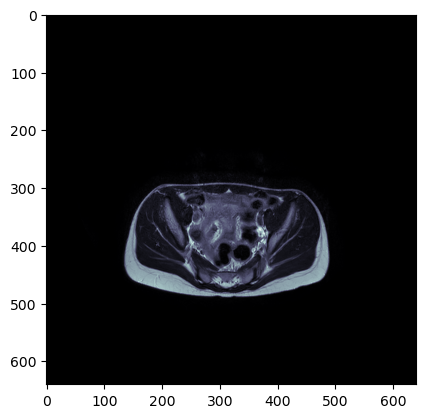

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-3-1r8qtqw.dcm


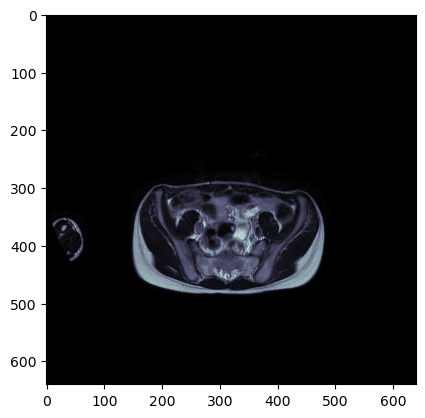

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-4-1s9fpdk.dcm


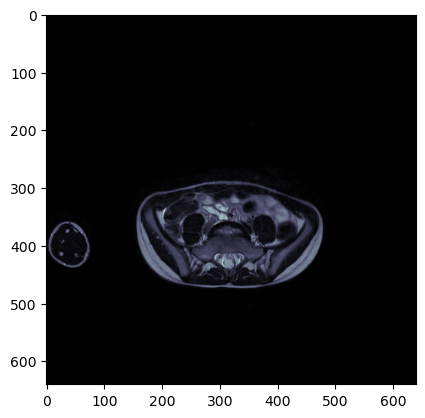

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-5-4x287d.dcm


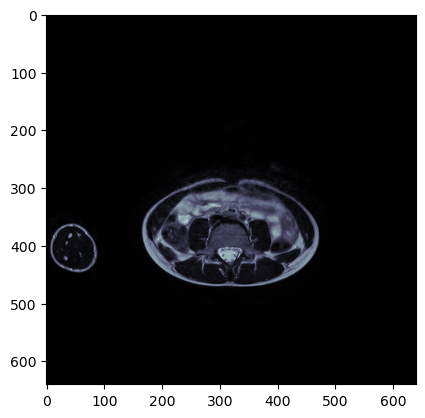

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-6-1momjqf.dcm


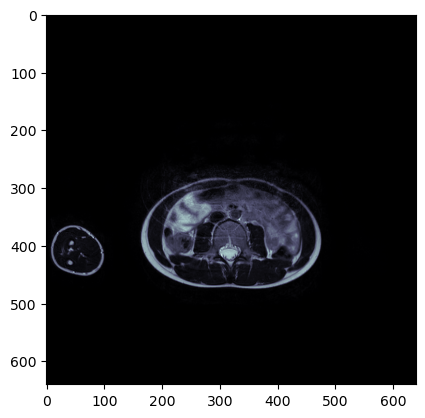

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-7-1o58z86.dcm


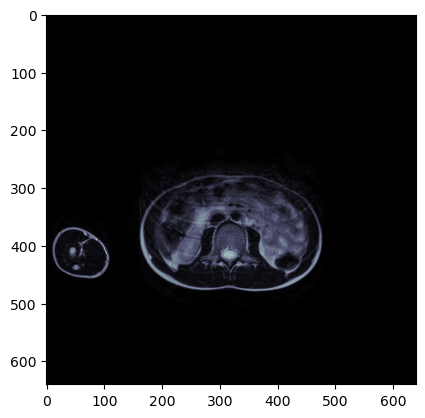

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-8-1qymmma.dcm


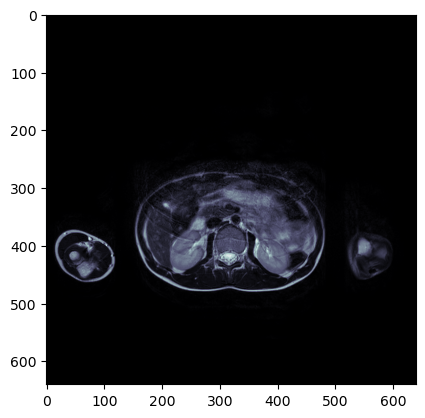

Name: 1.2.826.0.1.3680043.9.6827.3440074202224637335148213065604128687-901-9-179lmlj.dcm


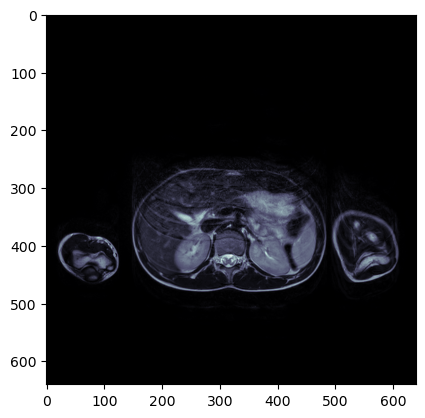

In [27]:
root = tk.Tk()
root.withdraw()

PathAux = filedialog.askdirectory(title="DICOM Images")
#Dcm_ROI = pydicom.dcmread(file_name)
#Dcm_im_ROI = np.copy(Dcm_ROI.pixel_array)
    
Dcm_im_all = []

for root,dirs,files in os.walk(PathAux):
    for i in files:
        if i.endswith(".dcm"):
            file_name=os.path.join(root,i)                  #Lee path de cada imagen
            Dcm = pydicom.dcmread(file_name)
            Dcm_im = np.copy(Dcm.pixel_array)
            Dcm_im_all.append(Dcm_im)
        print('Name:',i)
        plt.imshow(Dcm_im, cmap = plt.cm.bone)
        plt.show()

In [29]:

FRAME=Dcm_im_all[8]

min_value = int(np.min(FRAME))
max_value = int(np.max(FRAME))
image = sitk.GetImageFromArray(FRAME)

In [30]:
# Obtener las dimensiones de la imagen
size = image.GetSize()
mitad_x = size[0] 
mitad_y = size[1] // 2

# Crear una imagen negra de la mitad del tamaño de la imagen original
imagen_negra = sitk.Image([mitad_x, mitad_y], sitk.sitkUInt16)  # Cambiado a UInt16
imagen_negra.SetOrigin(image.GetOrigin())
imagen_negra.SetSpacing(image.GetSpacing())

# Convertir la imagen negra al mismo tipo de píxel que la imagen original
imagen_negra = sitk.Cast(imagen_negra, image.GetPixelID())

# Pegar la imagen negra en la esquina superior izquierda de la imagen original
paste_filter = sitk.PasteImageFilter()
paste_filter.SetSourceSize(imagen_negra.GetSize())
paste_filter.SetSourceIndex([0, 0])
paste_filter.SetDestinationIndex([0, 0])
imagen_resultante = paste_filter.Execute(image, imagen_negra)


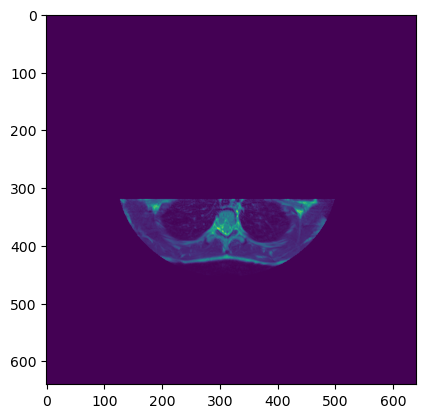

In [31]:
imagefinal2 = sitk.GetArrayFromImage(imagen_resultante)
plt.imshow(imagefinal2)
plt.show()


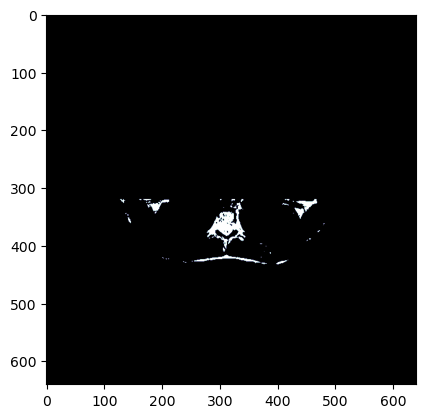

In [32]:
mask = sitk.IntensityWindowing(imagen_resultante, 250, 255, 0, 255)
binary_image1 = sitk.GetArrayFromImage(mask)

plt.imshow(binary_image1,cmap = plt.cm.bone)
plt.show()

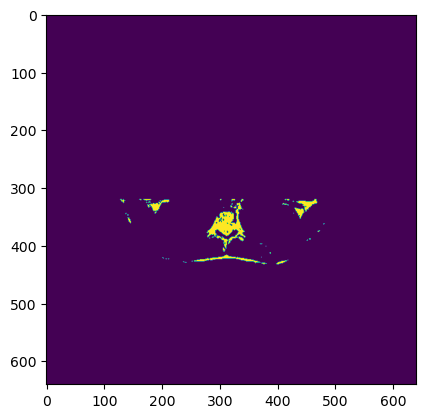

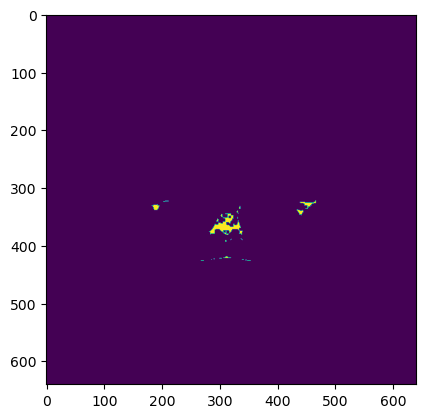

In [33]:
otsu_filter = sitk.OtsuThresholdImageFilter()

otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
binary_image = otsu_filter.Execute(mask)

imagefinal = sitk.GetArrayFromImage(binary_image)

plt.imshow(imagefinal)
plt.show()


kernel = np.ones((4, 4), np.uint8)  # Adjust the size of the kernel as needed
eroded_image = cv2.morphologyEx(imagefinal, cv2.MORPH_ERODE, kernel)
plt.imshow(eroded_image)
plt.show()






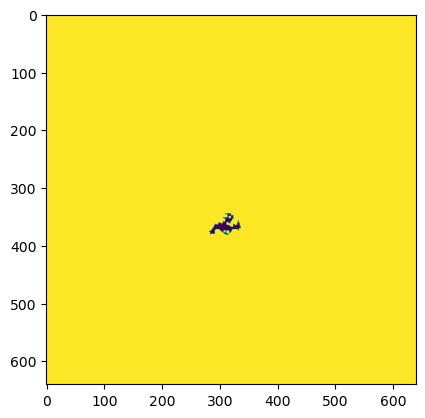

In [34]:
eroded_image1=sitk.GetImageFromArray(eroded_image)

component_image = sitk.ConnectedComponent(eroded_image1)
sorted_component_image = sitk.RelabelComponent(component_image, sortByObjectSize=True)
largest_component_binary_image = sorted_component_image == 1
largest_component_binary_image = sitk.Not(largest_component_binary_image)
# Ensure both images have the same pixel type (e.g., 16-bit unsigned integer)
common_pixel_type = sitk.sitkUInt16

imagefinal = sitk.GetArrayFromImage(largest_component_binary_image)

plt.imshow(imagefinal)
plt.show()


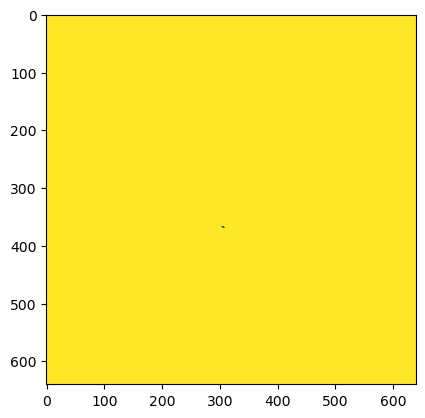

In [35]:

kernel = np.ones((10, 10), np.uint8)  # Adjust the size of the kernel as needed
eroded_image = cv2.morphologyEx(imagefinal, cv2.MORPH_DILATE, kernel)
plt.imshow(eroded_image)
plt.show()

In [36]:

kernel = np.ones((4, 4), np.uint8)  # Adjust the size of the kernel as needed
binary_image = cv2.morphologyEx(imagefinal, cv2.MORPH_CLOSE, kernel)
binary_image = sitk.GetImageFromArray(binary_image)

plt.imshow(closing_img)
plt.show()

NameError: name 'closing_img' is not defined